### Implementing simple Chatbot using LangGraph

In [35]:
from typing_extensions import TypedDict
from langgraph.graph import START , END , StateGraph
from IPython.display import Image , display

# Introducing Reducers

from typing import Annotated
from langgraph.graph.message import add_messages

 **Annotated** : Here it basically combine messages based on ID.

 It mean if and conversation is going on between Human and AI , it give keep appending those messages 

 Like Human Message + AI message + Human message + AI response +.......

 This is done with **Annotated** combined with **add_messageS**

 Here this add message is called : -->

 #### Reducer 

In [36]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [37]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [38]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="o1-mini")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 276, 'prompt_tokens': 9, 'total_tokens': 285, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 256, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'o1-mini-2024-09-12', 'system_fingerprint': 'fp_1f2eb2a0a3', 'id': 'chatcmpl-CJFTcKurUtIHzVhzJYiLyiocilRyP', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--692d66f1-c44e-4cb2-ab19-f2babe09f0e4-0', usage_metadata={'input_tokens': 9, 'output_tokens': 276, 'total_tokens': 285, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 256}})

In [39]:
from langchain_groq import ChatGroq
llm_grok = ChatGroq(model="qwen/qwen3-32b")
llm_grok.invoke("Hey I am Pawan and i like playing cricket what are two important rules in cricket ? explain in 30 words")

AIMessage(content='<think>\nOkay, so the user is Pawan and he likes playing cricket. He\'s asking for two important rules in cricket, each explained in 30 words. Let me start by recalling the basic rules of cricket. First, there\'s the batting rule where a bowler delivers the ball, and the batsman tries to hit it. If the bowler bowls three no-balls, the batting team gets a run and another delivery. Wait, no, the three consecutive no-balls rule might not be the most important. Maybe the Law of No Ball itself is a key rule. A no-ball is if the bowler steps over the popping crease or there\'s an extra run.\n\nThen, for the second rule, there\'s the run-out. If a fielder hits the stumps before the batsman crosses the crease, the batsman is out. That\'s crucial for dismissing the opposition. Also, there\'s the LBW rule, but maybe that\'s more complex. Alternatively, the Law of Wickets – a batsman is out if the bails are removed from the stumps by the bowler\'s delivery. But run-out is a com

# Start with creating Nodes

In [40]:
def superbot(state:State):
    return {"messages":[llm_grok.invoke(state["messages"])]}

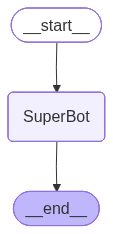

In [41]:
graph = StateGraph(State)
## Node
graph.add_node("SuperBot",superbot)

## Edges
graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)

graph_builder = graph.compile()


## View
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [42]:
## Invocation
graph_builder.invoke({"messages":"Hi,My name is Pawan and i Like cricket"})

{'messages': [HumanMessage(content='Hi,My name is Pawan and i Like cricket', additional_kwargs={}, response_metadata={}, id='002a1245-d2bd-4025-8ad7-9fecf08e007d'),
  AIMessage(content="<think>\nOkay, the user introduced himself as Pawan and mentioned he likes cricket. I should respond in a friendly and engaging way. Let's start by acknowledging his name and interest. Maybe ask him more about cricket to keep the conversation going. I should check if there's anything specific he wants to talk about, like a recent match or his favorite team. Also, offer help if he has any questions related to cricket or anything else. Keep the tone positive and approachable. Make sure to use proper grammar and friendly emojis to make it more personable. Let me put that all together.\n</think>\n\nHi Pawan! 🏏 Nice to meet you! Cricket is an amazing sport—do you follow a particular team or player closely? Or maybe you're into playing it yourself? Let me know if you'd like to chat about the game, recent matc

## Streaming the responses

In [43]:
for event in graph_builder.stream({"messages":"Hello My name is Pawan"},stream_mode = "values"):
    print(event)

{'messages': [HumanMessage(content='Hello My name is Pawan', additional_kwargs={}, response_metadata={}, id='983c9cf4-810d-41b6-adb2-4f3bb730c0b8')]}
{'messages': [HumanMessage(content='Hello My name is Pawan', additional_kwargs={}, response_metadata={}, id='983c9cf4-810d-41b6-adb2-4f3bb730c0b8'), AIMessage(content="<think>\nOkay, the user introduced himself as Pawan. I should respond in a friendly and welcoming manner. Let me make sure to acknowledge his introduction and offer assistance. I'll keep it simple and open-ended so he feels comfortable asking for help with whatever he needs. No need for any special formatting, just a natural, conversational response.\n</think>\n\nHello, Pawan! Nice to meet you. How can I assist you today? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 14, 'total_tokens': 105, 'completion_time': 0.174106566, 'prompt_time': 0.012036539, 'queue_time': 0.056490661, 'total_time': 0.186143105}, 'model_name':